# HW1 Q7 Programming Part: Vertebral Column Data Set

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff

## (a) Download Data Set


In [4]:
data,meta=arff.loadarff('column_2C_weka.arff')
column_data=pd.DataFrame(data)
print(column_data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  
0        98.672917                 -0.2

In [5]:
column_data['class']=column_data['class'].apply(lambda x:1 if x==b'Abnormal' or x==1 else 0)
print(column_data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  class  
0        98.672917                 -0.254400 

## (b) Pre-Processing and Exploratory data analysis:

### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

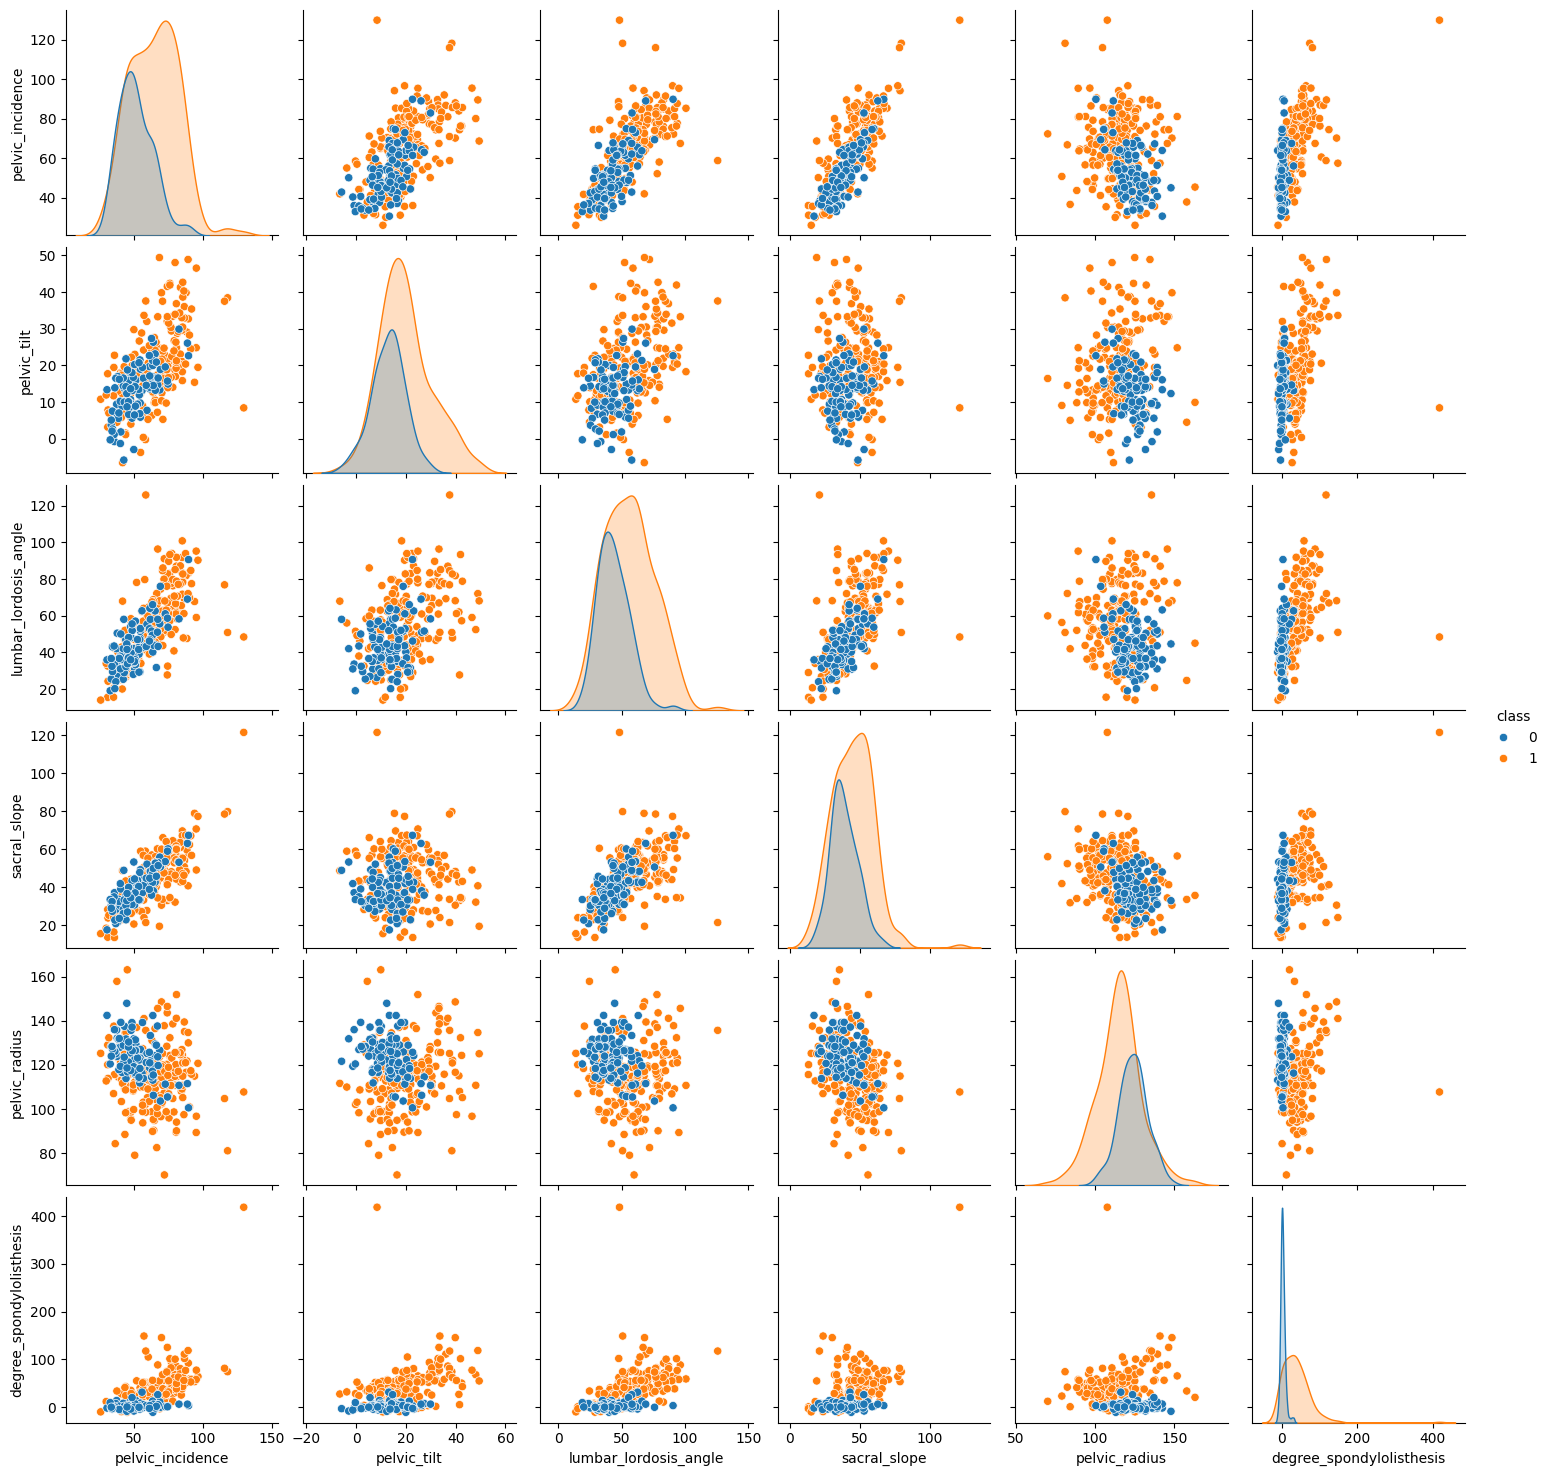

In [6]:
sns.pairplot(column_data,hue='class')
plt.show()

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

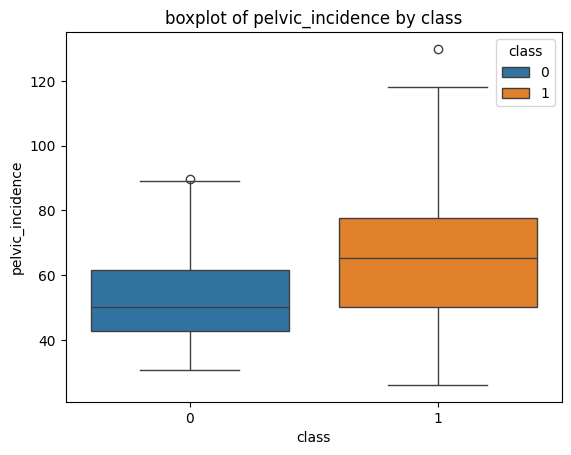

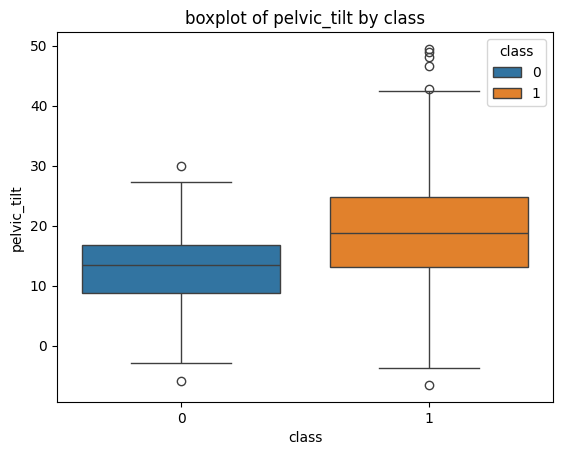

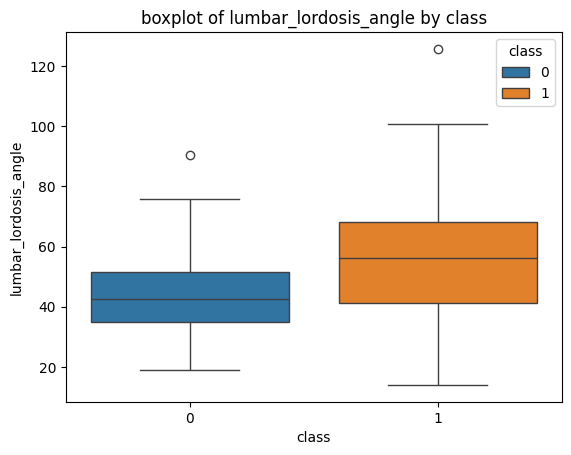

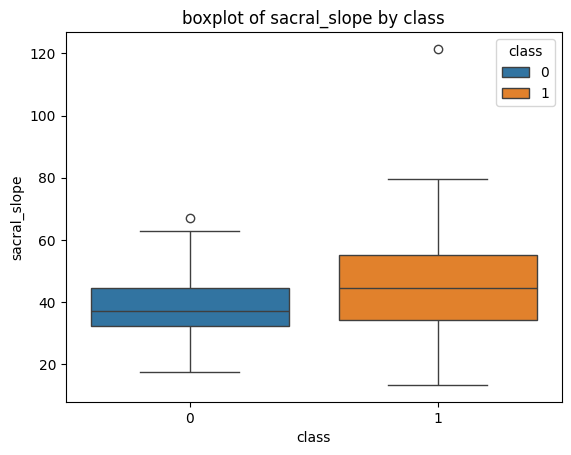

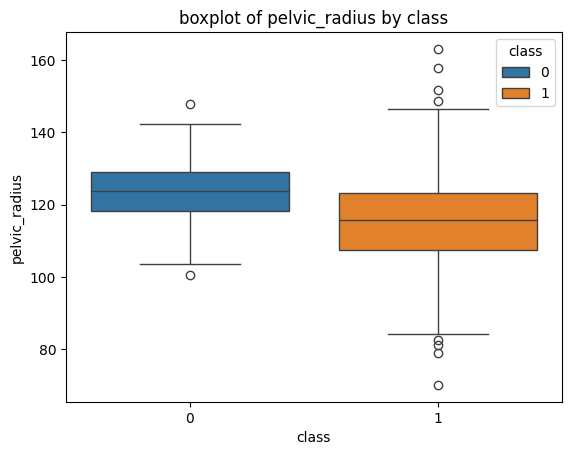

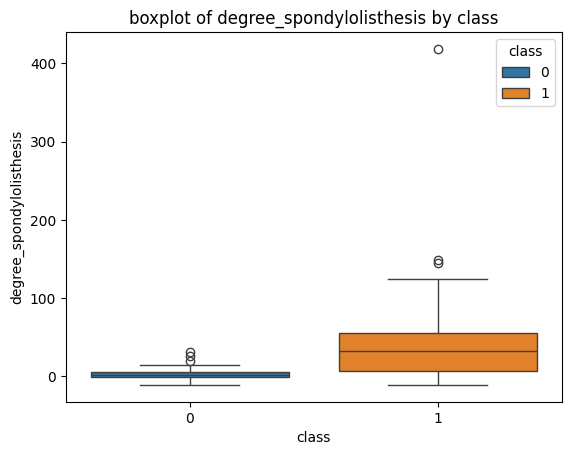

In [7]:
for variables in column_data.columns[:-1] :
  # print(variables)
  sns.boxplot(x='class', y=variables, data=column_data, hue='class')
  plt.title(f'boxplot of {variables} by class')
  plt.show()

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [8]:
train_data0=column_data[column_data['class']==0].iloc[:70]
train_data1=column_data[column_data['class']==1].iloc[:140]

train_data=pd.concat([train_data0,train_data1])
print(train_data)

test_data=column_data.drop(train_data.index)
print(test_data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
135         77.121344    30.349874              77.481083     46.771470   
136         88.024499    39.844669              81.774473     48.179830   
137         83.396606    34.310989              78.423293     49.085617   
138         72.054034    24.700737              79.874016     47.353297   
139         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  class  
210     127.632875                  7.986683 

## (c) Classification using KNN on Vertebral Column Data Set

### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [9]:
from sklearn.neighbors import KNeighborsClassifier

train_x=train_data.iloc[:,:-1]
train_y=train_data.iloc[:,-1]
test_x=test_data.iloc[:,:-1]
test_y=test_data.iloc[:,-1]

knn=KNeighborsClassifier(metric='euclidean')
knn.fit(train_x, train_y)

predictions=knn.predict(test_x)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0]


### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k*.

In [10]:
train_error=[]
test_error=[]
k_list=[]

for k in range(208,0,-3) :
  knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(train_x,train_y)

  # train_pred_y=knn.predict(train_x)
  train_error.append(1-knn.score(train_x,train_y))

  # test_pred_y=knn.predict(test_x)
  test_error.append(1-knn.score(test_x,test_y))

  k_list.append(k)

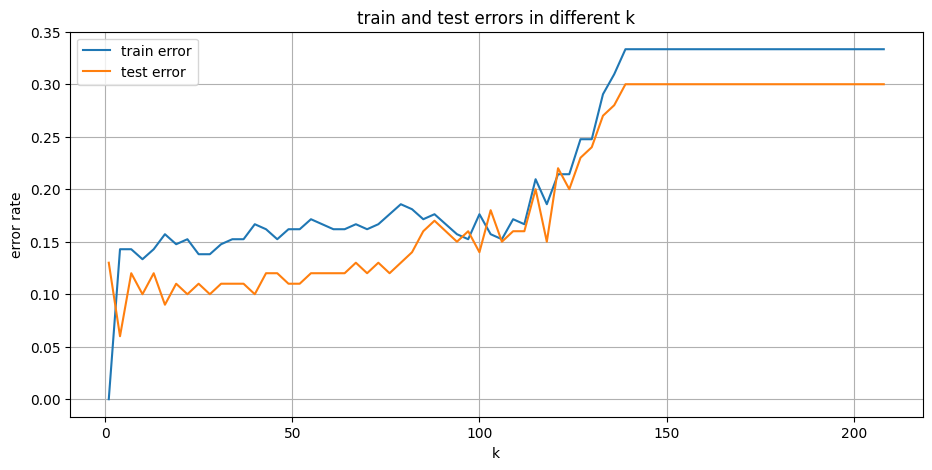

In [11]:
plt.figure(figsize=(11,5))
plt.plot(k_list,train_error,label='train error')
plt.plot(k_list,test_error,label='test error')
plt.title('train and test errors in different k')
plt.xlabel('k')
plt.ylabel('error rate')
plt.legend(loc='best')
plt.grid()
plt.show()

In [12]:
min_test_error=min(test_error)
best_k=208-3*test_error.index(min_test_error)
print(f"the most suitable k is {best_k}\nthe minimun test error is {min_test_error}.")

the most suitable k is 4
the minimun test error is 0.06000000000000005.


( for Question (f) )

In [13]:
min_train_error=min(train_error)
k_of_min_train_error=208-3*train_error.index(min_train_error)
print(f"the minimun train error is {min_train_error} ( when k={k_of_min_train_error} )")

the minimun train error is 0.0 ( when k=1 )


when k=k*

In [14]:
# when k=4
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(train_x,train_y)
test_pred_y=knn.predict(test_x)

cm=confusion_matrix(test_y,test_pred_y)
print('confusion matrix:\n',cm)

TP=cm[1,1]  # true positive
FP=cm[0,1]  # false positive
TN=cm[0,0]  # true negative
FN=cm[1,0]  # false negative

TPR=TP/(TP+FN) # true positive rate / recall
TNR=TN/(TN+FP) # true negative rate
print('true positive rate:',TPR)
print('true negative rate:',TNR)

precision=TP/(TP+FP)
print('precision:',precision)

f1_score=2*precision*TPR/(precision+TPR)
print('F1_score:',f1_score)

confusion matrix:
 [[25  5]
 [ 1 69]]
true positive rate: 0.9857142857142858
true negative rate: 0.8333333333333334
precision: 0.9324324324324325
F1_score: 0.9583333333333333


### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of the training set, when the size of the training set is N∈{10,20,30,…,210}. Notes: 1. For each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N-⌊N/3⌋ rows of Class 1 in the training set you created in 7(b)iii. 2. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,…,196}. This plot is called a Learning Curve.


In [15]:
test_error=[]
N_list=[]

for N in range(10,211,10) :
  train_data0_new=train_data[train_data['class']==0].iloc[:N//3]
  train_data1_new=train_data[train_data['class']==1].iloc[:N-N//3]
  train_data_new=pd.concat([train_data0_new,train_data1_new])

  train_x_new=train_data_new.iloc[:,:-1]
  train_y_new=train_data_new.iloc[:,-1]

  min_test_error=float('inf')

  k=1
  while k<N :
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(train_x_new,train_y_new)

    current_error=1-knn.score(test_x,test_y)
    if current_error<min_test_error :
      min_test_error=current_error

    k+=5

  test_error.append(min_test_error)
  N_list.append(N)

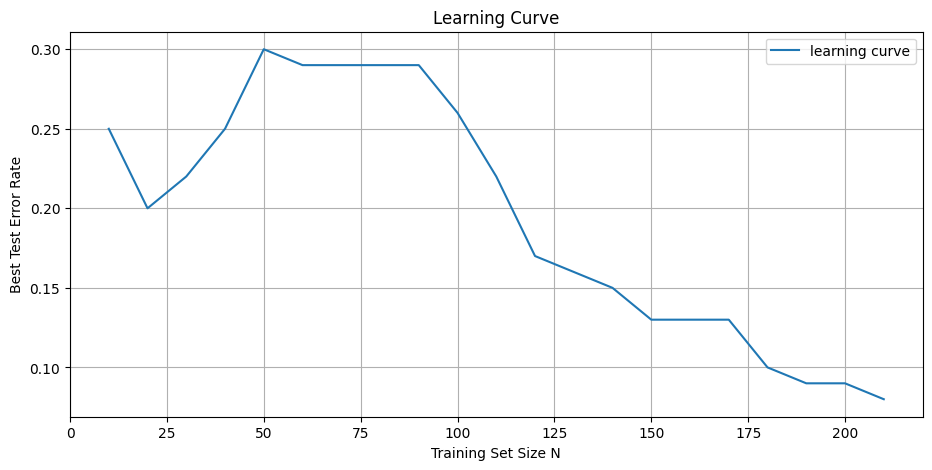

In [16]:
plt.figure(figsize=(11,5))
plt.plot(N_list,test_error,label='learning curve')
plt.xlabel('Training Set Size N')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

In [17]:
best_k_value=[]
best_test_error=[]

### i. Minkowski Distance:
#### A. which becomes Manhattan Distance with p = 1.


In [18]:
test_error_Manhattan=[]

for k in range(1,197,5) :
  knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=1)
  knn.fit(train_x,train_y)

  test_error=1-knn.score(test_x,test_y)
  test_error_Manhattan.append(test_error)

#print(test_error_Manhattan)
min_test_error=min(test_error_Manhattan)

best_k=[]
for i in range (len(test_error_Manhattan)) :
  if test_error_Manhattan[i]==min_test_error :
    best_k.append(1+5*i)

print(f"the most suitable k is {best_k}\nthe minimun test error is {min_test_error}.")

the most suitable k is [1, 6, 11, 26]
the minimun test error is 0.10999999999999999.


In [19]:
best_k=6
print('in this case, we choose k*=6 as the most suitable k')

best_k_value.append(best_k)
best_test_error.append(min_test_error)

in this case, we choose k*=6 as the most suitable k


#### B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found or the Manhattan distance in 7(d)iA. What is the best log10(p)?

In [20]:
test_error_log=[]
for l in range (1,11) :
  knn=KNeighborsClassifier(n_neighbors=best_k,metric='minkowski',p=10**(l/10))
  knn.fit(train_x,train_y)

  test_error=1-knn.score(test_x,test_y)
  test_error_log.append(test_error)

#print(test_error_log)
min_test_error=min(test_error_log)
best_p=(test_error_log.index(min_test_error)+1)/10
print(f"the best p is {10**best_p}\nthe best log10(p) is {best_p}\nthe minimun test error is {min_test_error}.")

the best p is 3.9810717055349722
the best log10(p) is 0.6
the minimun test error is 0.06000000000000005.


#### C. which becomes Chebyshev Distance with p → ∞

In [21]:
test_error_Chebyshev=[]

for k in range(1,197,5) :
  knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=float('inf'))
  knn.fit(train_x,train_y)

  test_error=1-knn.score(test_x,test_y)
  test_error_Chebyshev.append(test_error)

#print(test_error_Chebyshev)
min_test_error=min(test_error_Chebyshev)
best_k=1+5*test_error_Chebyshev.index(min_test_error)

print(f"the most suitable k is {best_k}\nthe minimun test error is {min_test_error}.")

best_k_value.append(best_k)
best_test_error.append(min_test_error)

the most suitable k is 16
the minimun test error is 0.07999999999999996.


### ii. Mahalanobis Distance.

In [29]:
cov_matrix=np.cov(train_x,rowvar=False)
inv_cov_matrix=np.linalg.inv(cov_matrix)

test_error_Mahalanobis=[]
k_list=[]

for k in range(1,197,5) :
  knn=KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'VI':inv_cov_matrix})
  knn.fit(train_x,train_y)

  test_error=1-knn.score(test_x,test_y)
  test_error_Mahalanobis.append(test_error)

  k_list.append(k)

#print(test_error_Mahalanobis)
min_test_error=min(test_error_Mahalanobis)
best_k=1+5*test_error_Mahalanobis.index(min_test_error)

print(f"the most suitable k is {best_k}\nthe minimun test error is {min_test_error}.")

best_k_value.append(best_k)
best_test_error.append(min_test_error)

the most suitable k is 1
the minimun test error is 0.14.


### Summarize the test errors (i.e., when k = k*) in a table.

In [23]:
df_errors=pd.DataFrame()
df_errors['k']=k_list
df_errors['test_error_Manhattan']=test_error_Manhattan
df_errors['test_error_Chebyshev']=test_error_Chebyshev
df_errors['test_error_Mahalanobis']=test_error_Mahalanobis
print(df_errors)

      k  test_error_Manhattan  test_error_Chebyshev  test_error_Mahalanobis
0     1                  0.11                  0.13                    0.14
1     6                  0.11                  0.10                    0.16
2    11                  0.11                  0.12                    0.18
3    16                  0.12                  0.08                    0.16
4    21                  0.12                  0.11                    0.19
5    26                  0.11                  0.12                    0.17
6    31                  0.12                  0.12                    0.19
7    36                  0.13                  0.10                    0.20
8    41                  0.13                  0.13                    0.21
9    46                  0.13                  0.12                    0.19
10   51                  0.14                  0.12                    0.22
11   56                  0.13                  0.12                    0.21
12   61     

In [24]:
df_best_k_error=pd.DataFrame()
index=['Manhattan','Chebyshev','Mahalanobis']
df_best_k_error.index=index
df_best_k_error['best_k']=best_k_value
df_best_k_error['test_error']=best_test_error
print(df_best_k_error)

             best_k  test_error
Manhattan         6        0.11
Chebyshev        16        0.08
Mahalanobis       1        0.14


## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [31]:
diff_matrics=['euclidean','manhattan','chebyshev']

for matrix in diff_matrics :
  test_errors=[]
  for k in range (1,197,5) :
    knn=KNeighborsClassifier(n_neighbors=k,weights='distance',metric=matrix)
    knn.fit(train_x,train_y)

    test_error=1-knn.score(test_x,test_y)
    test_errors.append(test_error)

  #print(test_errors)
  min_test_error=min(test_errors)
  best_k=1+5*test_errors.index(min_test_error)

  print(f"the most suitable k is {best_k}\nthe minimun test error is {min_test_error}.\n")

the most suitable k is 6
the minimun test error is 0.09999999999999998.

the most suitable k is 26
the minimun test error is 0.09999999999999998.

the most suitable k is 16
the minimun test error is 0.10999999999999999.



## (f) What is the lowest training error rate you achieved in this homework?

From 7(c) ii., we can see that when using the Euclidean metric and k=1, the training error rate is 0.0, which is the lowest.